# **Operaciones de aprendizaje automático**
## **Maestría en Inteligencia Artificial Aplicada**
### **Tecnológico de Monterrey**
### **Equipo 36**
**Fase 1**

## **0. Librerías**

In [1]:
# === Setup ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
### 📦 Información de Versionado con DVC

**Este notebook es el PASO 1 del pipeline:**
1. Lee: `data/raw/student_entry_performance.csv` (versionado con DVC)
2. Aplica: EDA y limpieza de datos
3. Guarda: `data/processed/student_performance.csv` (se versionará con DVC)

**⚠️ PRIMERA VEZ - Configuración inicial:**

```bash
# Versionar el archivo fuente (solo una vez)
bash setup_dvc.sh data/raw/student_entry_performance.csv
# Tag sugerido: data-v1.0-raw
```

Después de ejecutar este notebook, verás las instrucciones para versionar el resultado.

---


## **1. Analisis de Requerimientos**

En esta actividad se desarrollarán las primeras etapas de un proyecto de Machine Learning empleando el conjunto de datos titulado “Student Performance on an Entrance Examination”.
Este dataset contiene información de candidatos que participaron en el examen de admisión médica (Common Entrance Examination - CEE) para ingresar a facultades de medicina en Assam (India), recopilada por el Prof. Jiten Hazarika, donde el problema principal a resolver consiste en identificar aquellos factores que influyen en el rendimiento académico de los estudiantes que presentan el examen de ingreso.

El objetivo del proyecto es construir un modelo de clasificación que prediga el desempeño del candidato en función de variables como el género, tipo de coaching, antecedentes académicos y ocupación de los padres. Esto a partir del dataset "student_entry_performance_modified.csv".

Esta fase está estructurada para abarcar desde la exploración, manipulación y preparación de los datos, hasta el diseño y evaluación de modelos de clasificación que permitan comprender los factores asociados al rendimiento en el examen de ingreso.

In [ ]:
# === Leer dataset RAW versionado con DVC ===
# Este es el archivo fuente original, versionado con DVC
DATA_PATH = "../data/raw/student_entry_performance.csv"

print("="*70)
print("📂 PASO 1: Cargando dataset RAW")
print("="*70)
print(f"Archivo: {DATA_PATH}")
print("💡 Este archivo está versionado con DVC (data-v1.0-raw)")
print("="*70)

df_raw = pd.read_csv(DATA_PATH)
# Copia de trabajo
df = df_raw.copy()

print(f"\n✅ Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print("="*70)
df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,mixed_type_col
0,Excellent,male,General,NO,one,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,unknown
1,Excellent,MALE,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,666
2,Excellent,male,OBC,OA,TWO,others,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,unknown
3,Excellent,male,General,WA,one,SEBA,AHSEC,OTHERS,Excellent,eXCELLENT,SCHOOL_TEACHER,school_teacher,275
4,Excellent,male,General,OA,two,NaN,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,6


In [3]:
df.shape

(679, 13)

A través del uso de técnicas de Machine Learning, este proyecto busca ofrecer un sistema de apoyo analítico que permita comprender cuales son las variables académicas y socioeconómicas que influyen en el desempeño estudiantil. La propuesta de valor radica en transformar los datos obtenidos del pasado en conocimiento útil para mejorar la planificación educativa y la preparación de futuros aspirantes.

## **2. Manipulación y preparación de datos**

### 2.1 Mayus

Como primer acercamiento, en el df se aprecia que el elemento 3 en la columna de "Class_XII_Percentage" presenta el valor de "eXCELLENT", lo cual coincide con el valor de "Excellent" pero al no tener el mismo formato, no se reconoce igual, es por esto que la primera acción es pasarlo a mayúsculas para homogeneizar el df. 

In [4]:
df.columns

Index(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation', 'mixed_type_col'],
      dtype='object')

In [5]:
apply_mayus = ['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation', 'mixed_type_col']
df[apply_mayus] = df[apply_mayus].apply(lambda x: x.str.upper())

df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,mixed_type_col
0,EXCELLENT,MALE,GENERAL,NO,ONE,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,DOCTOR,OTHERS,UNKNOWN
1,EXCELLENT,MALE,OBC,WA,TWO,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,HOUSE_WIFE,666
2,EXCELLENT,MALE,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,EXCELLENT,EXCELLENT,BUSINESS,HOUSE_WIFE,UNKNOWN
3,EXCELLENT,MALE,GENERAL,WA,ONE,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,SCHOOL_TEACHER,275
4,EXCELLENT,MALE,GENERAL,OA,TWO,NaN,CBSE,ENGLISH,EXCELLENT,EXCELLENT,COLLEGE_TEACHER,HOUSE_WIFE,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,AVERAGE,MALE,OBC,WA,TWO,CBSE,CBSE,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE,900
675,AVERAGE,FEMALE,ST,WA,TWO,SEBA,CBSE,ENGLISH,VG,VG,BUSINESS,HOUSE_WIFE,270
676,AVERAGE,MALE,ST,WA,TWO,SEBA,AHSEC,ENGLISH,VG,GOOD,OTHERS,HOUSE_WIFE,NaN
677,VG,MALE,SC,WA,TWO,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE,NaN


### 2.2 Trim

In [6]:
df['Performance'].value_counts()

Performance
GOOD           199
VG             194
AVERAGE        146
EXCELLENT       96
 GOOD           14
 AVERAGE        12
 EXCELLENT       6
 VG              6
Name: count, dtype: int64

Tomando como ejemplo la columna de "Performance", se observa que hay valores que a la vista son iguales, pero se categorizan como otro tipo, posiblemente presente en las demás columnas, es por esto que se aplica la operación trim para solucionar esto. 

In [7]:
df[apply_mayus] = df[apply_mayus].apply(lambda x: x.str.strip())
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,mixed_type_col
0,EXCELLENT,MALE,GENERAL,NO,ONE,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,DOCTOR,OTHERS,UNKNOWN
1,EXCELLENT,MALE,OBC,WA,TWO,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,HOUSE_WIFE,666
2,EXCELLENT,MALE,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,EXCELLENT,EXCELLENT,BUSINESS,HOUSE_WIFE,UNKNOWN
3,EXCELLENT,MALE,GENERAL,WA,ONE,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,SCHOOL_TEACHER,275
4,EXCELLENT,MALE,GENERAL,OA,TWO,NaN,CBSE,ENGLISH,EXCELLENT,EXCELLENT,COLLEGE_TEACHER,HOUSE_WIFE,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,AVERAGE,MALE,OBC,WA,TWO,CBSE,CBSE,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE,900
675,AVERAGE,FEMALE,ST,WA,TWO,SEBA,CBSE,ENGLISH,VG,VG,BUSINESS,HOUSE_WIFE,270
676,AVERAGE,MALE,ST,WA,TWO,SEBA,AHSEC,ENGLISH,VG,GOOD,OTHERS,HOUSE_WIFE,NaN
677,VG,MALE,SC,WA,TWO,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE,NaN


In [8]:
df['Performance'].value_counts()

Performance
GOOD         213
VG           200
AVERAGE      158
EXCELLENT    102
Name: count, dtype: int64

Distribución absoluta:


Performance
GOOD         213
VG           200
AVERAGE      158
EXCELLENT    102
NaN            6
Name: count, dtype: int64


Distribución relativa:


Performance
GOOD         0.314
VG           0.295
AVERAGE      0.233
EXCELLENT    0.150
NaN          0.009
Name: count, dtype: float64

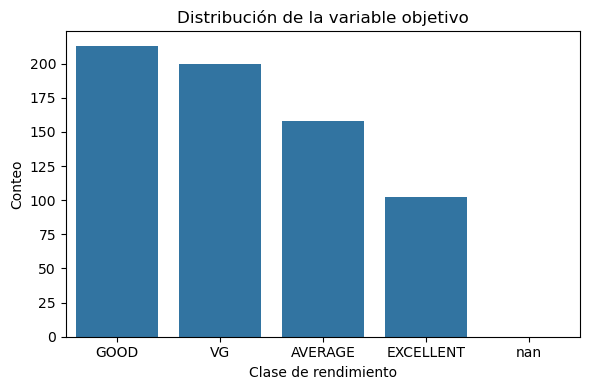

Imbalance ratio (max/min): 35.50
Aviso: clases potencialmente desbalanceadas.


In [9]:
# Conteos por clase
target_col = 'Performance'
target_counts = df[target_col].value_counts(dropna=False)
target_ratio = (target_counts / len(df)).round(3)

print("Distribución absoluta:")
display(target_counts)
print("\nDistribución relativa:")
display(target_ratio)

# Histograma / barras por clase
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, order=target_counts.index)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Clase de rendimiento")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Heurística de desbalance (ratio max/min)
if target_counts.min() > 0:
    imbalance_ratio = target_counts.max() / target_counts.min()
    print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")
    if imbalance_ratio >= 1.5:
        print("Aviso: clases potencialmente desbalanceadas.")


### 2.3 Null values

In [10]:
df.isnull().sum()

Performance              6
Gender                   6
Caste                    4
coaching                 6
time                     5
Class_ten_education     11
twelve_education         9
medium                   6
Class_ X_Percentage      4
Class_XII_Percentage     7
Father_occupation        3
Mother_occupation        5
mixed_type_col          68
dtype: int64

In [11]:
df["Gender"].value_counts()

Gender
MALE      361
FEMALE    310
NAN         2
Name: count, dtype: int64

Analizando la columna de "Gender", se aprecia que hay filas/entradas que no estan definidas y otras donde el valor es NAN, por lo que estas pueden descartarse sin ningun inconveniente ya que no representan un número importante de la muestra. Esta decisión busca evitar la introducción de sesgos al imputar valores sin fundamento estadístico, manteniendo la coherencia y calidad del conjunto de datos.

In [12]:
df = df.replace(["NAN", "NaN", "nan", "NULL", "NONE", " "], np.nan)

In [13]:
df.isnull().sum()

Performance              6
Gender                   8
Caste                    4
coaching                 6
time                     5
Class_ten_education     11
twelve_education        10
medium                   6
Class_ X_Percentage      6
Class_XII_Percentage     8
Father_occupation        4
Mother_occupation        5
mixed_type_col          68
dtype: int64

#### 2.3.1 Columna principal

Una vez asignados los strings con intención de ser valores nulos, tenemos que la columna de Performance con 6 valores nulos, y al ser la que nos interesa su estudio, es pertinente descartar sus valores nulos dado que estos valores no pueden emplearse para el entrenamiento ni la evaluación del modelo a diseñar.

In [14]:
df = df.dropna(subset=['Performance'])
df["Performance"].isnull().sum()

0

#### 2.3.2 Columna mixed_type_col

Asimismo, la columna "mixed_type_col" por la cantidad de datos de tipo nulo es muy probable que no aporte algún tipo de valor predictivo para el modelo, ya que su propia entrada mezcla valores de tipo numéricos y de texto. Es por esto que se descartó la columna para evitar ruido en el modelo.

In [15]:
df = df.drop(columns=['mixed_type_col'])
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,EXCELLENT,MALE,GENERAL,NO,ONE,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,DOCTOR,OTHERS
1,EXCELLENT,MALE,OBC,WA,TWO,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,HOUSE_WIFE
2,EXCELLENT,MALE,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,EXCELLENT,EXCELLENT,BUSINESS,HOUSE_WIFE
3,EXCELLENT,MALE,GENERAL,WA,ONE,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,SCHOOL_TEACHER
4,EXCELLENT,MALE,GENERAL,OA,TWO,NaN,CBSE,ENGLISH,EXCELLENT,EXCELLENT,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
674,AVERAGE,MALE,OBC,WA,TWO,CBSE,CBSE,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE
675,AVERAGE,FEMALE,ST,WA,TWO,SEBA,CBSE,ENGLISH,VG,VG,BUSINESS,HOUSE_WIFE
676,AVERAGE,MALE,ST,WA,TWO,SEBA,AHSEC,ENGLISH,VG,GOOD,OTHERS,HOUSE_WIFE
677,VG,MALE,SC,WA,TWO,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE


#### 2.3.3 Columnas con datos ordinales

Las columnas "Class_X_Percentage" y "Class_XII_Percentage" al ser de tipo ordinal, para no descartar sus valores nulos se les puede asignar el valor de su moda, lo cual no afecta en gran medida al modelo.

In [16]:
df.rename(columns={'Class_ X_Percentage': 'Class_X_Percentage'}, inplace=True) # Cambio de nombre de la columna para una mejor manipulación en el notebook
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,EXCELLENT,MALE,GENERAL,NO,ONE,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,DOCTOR,OTHERS
1,EXCELLENT,MALE,OBC,WA,TWO,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,HOUSE_WIFE
2,EXCELLENT,MALE,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,EXCELLENT,EXCELLENT,BUSINESS,HOUSE_WIFE
3,EXCELLENT,MALE,GENERAL,WA,ONE,SEBA,AHSEC,OTHERS,EXCELLENT,EXCELLENT,SCHOOL_TEACHER,SCHOOL_TEACHER
4,EXCELLENT,MALE,GENERAL,OA,TWO,NaN,CBSE,ENGLISH,EXCELLENT,EXCELLENT,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
674,AVERAGE,MALE,OBC,WA,TWO,CBSE,CBSE,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE
675,AVERAGE,FEMALE,ST,WA,TWO,SEBA,CBSE,ENGLISH,VG,VG,BUSINESS,HOUSE_WIFE
676,AVERAGE,MALE,ST,WA,TWO,SEBA,AHSEC,ENGLISH,VG,GOOD,OTHERS,HOUSE_WIFE
677,VG,MALE,SC,WA,TWO,SEBA,AHSEC,ENGLISH,EXCELLENT,EXCELLENT,OTHERS,HOUSE_WIFE


In [17]:
df["Class_X_Percentage"].value_counts()

Class_X_Percentage
EXCELLENT    511
VG           102
GOOD          41
AVERAGE       13
Name: count, dtype: int64

In [18]:
df['Class_X_Percentage'] = df['Class_X_Percentage'].fillna("EXCELLENT")
df["Class_X_Percentage"].value_counts()

Class_X_Percentage
EXCELLENT    517
VG           102
GOOD          41
AVERAGE       13
Name: count, dtype: int64

In [19]:
df["Class_XII_Percentage"].value_counts()

Class_XII_Percentage
EXCELLENT    396
VG           183
GOOD          75
AVERAGE       11
Name: count, dtype: int64

In [20]:
df['Class_XII_Percentage'] = df['Class_XII_Percentage'].fillna("EXCELLENT")
df["Class_XII_Percentage"].value_counts()

Class_XII_Percentage
EXCELLENT    404
VG           183
GOOD          75
AVERAGE       11
Name: count, dtype: int64

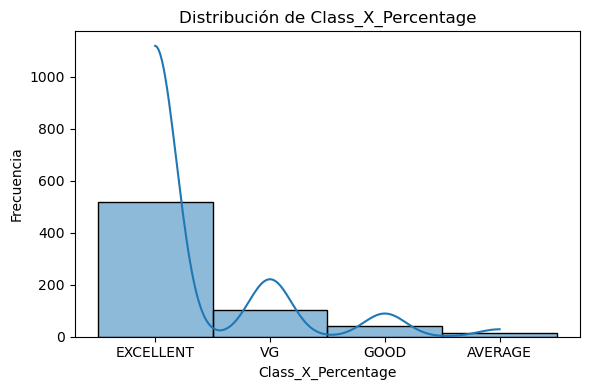

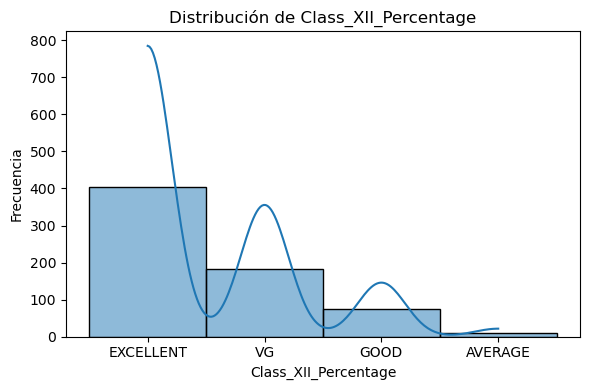

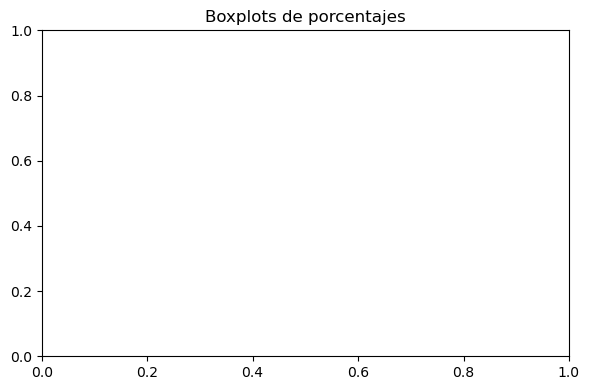

In [21]:
pct_cols = ['Class_X_Percentage', 'Class_XII_Percentage']
# Histogramas + KDE de porcentajes
for col in pct_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Boxplots para detectar atípicos
plt.figure(figsize=(max(6, 1.5*len(pct_cols)), 4))
sns.boxplot(data=df[pct_cols], orient="h")
plt.title("Boxplots de porcentajes")
plt.tight_layout()
plt.show()


#### 2.3.4 Columnas nominales

##### - Gender

In [22]:
df["Gender"].value_counts()

Gender
MALE      359
FEMALE    306
Name: count, dtype: int64

Al no poder suponer el género del que presenta, se optó por crear un nuevo valor "MISSING", el cual no interfiera con la muestra que se tiene y no afecta en gran medida debido a que son 8 datos faltantes de esta columna.

In [23]:
df['Gender'] = df['Gender'].fillna("MISSING")
df["Gender"].value_counts()

Gender
MALE       359
FEMALE     306
MISSING      8
Name: count, dtype: int64

Para las demás columnas, sus datos nulos se les asignó el valor correspondiente a sus modas

In [24]:
df['Caste'] = df['Caste'].fillna("GENERAL")
df['coaching'] = df['coaching'].fillna("WA")
df['time'] = df['time'].fillna("TWO")
df['Class_ten_education'] = df['Class_ten_education'].fillna("SEBA")
df['twelve_education'] = df['twelve_education'].fillna("AHSEC")
df['medium'] = df['medium'].fillna("ENGLISH")
df['Father_occupation'] = df['Father_occupation'].fillna("OTHERS")
df['Mother_occupation'] = df['Mother_occupation'].fillna("HOUSE_WIFE")

### 2.3.5 Evaluación

In [25]:
df.isnull().sum()

Performance             0
Gender                  0
Caste                   0
coaching                0
time                    0
Class_ten_education     0
twelve_education        0
medium                  0
Class_X_Percentage      0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
dtype: int64

Se aprecia que ya no hay valores nulos y se pudieron homogeneizar aquellas entradas que se reconocían similares en el DataFrame. 

## 3. Análisis Exploratorio de datos

### 3.1 Gráficos de barras para variables categóricas + cruces con la variable objetivo

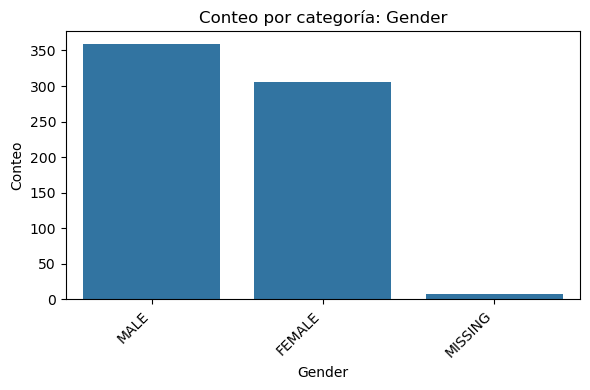

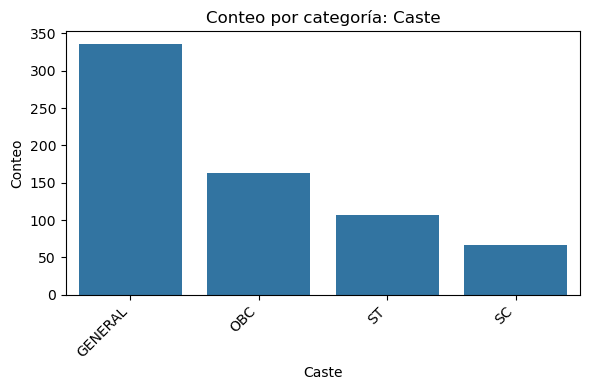

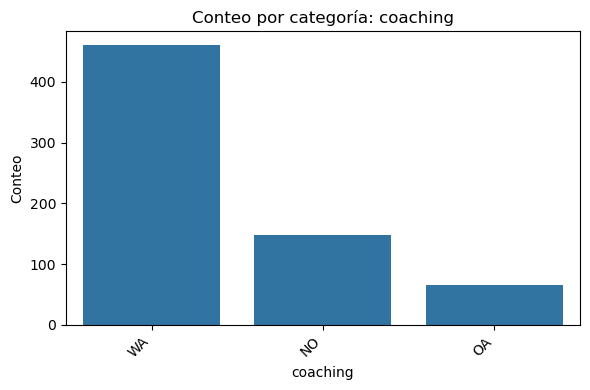

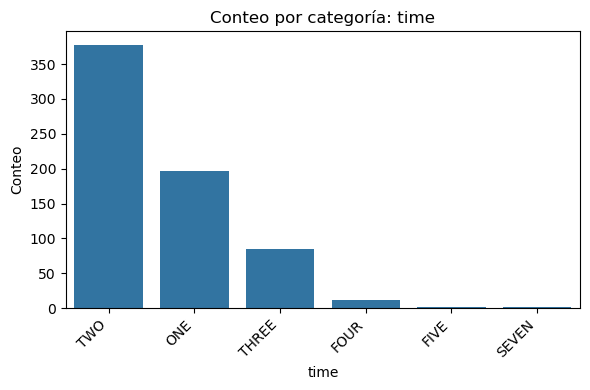

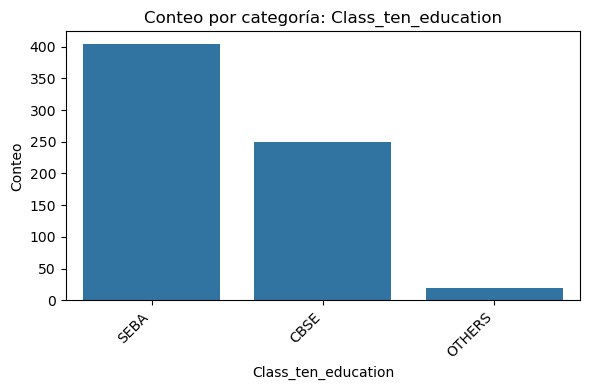

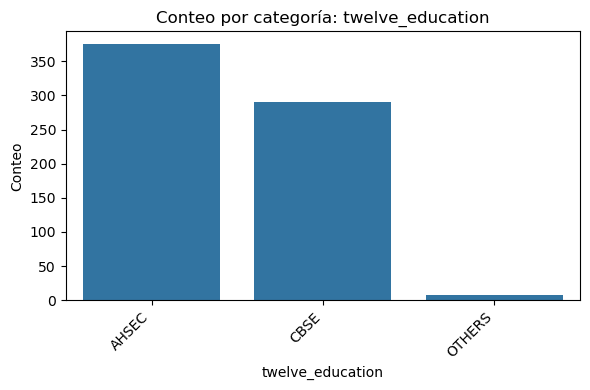

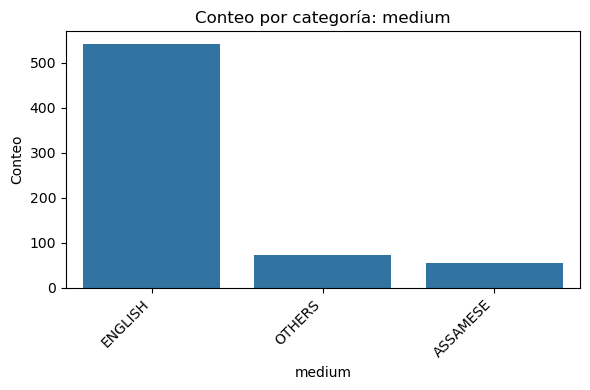

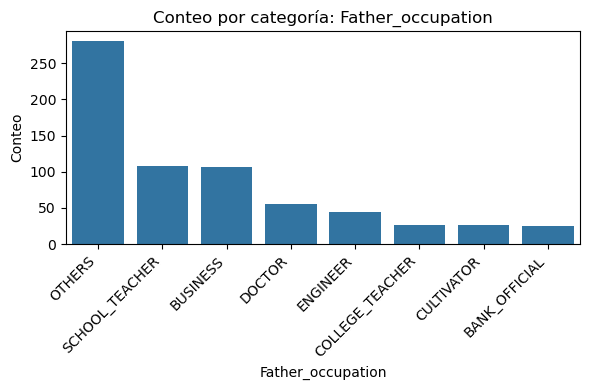

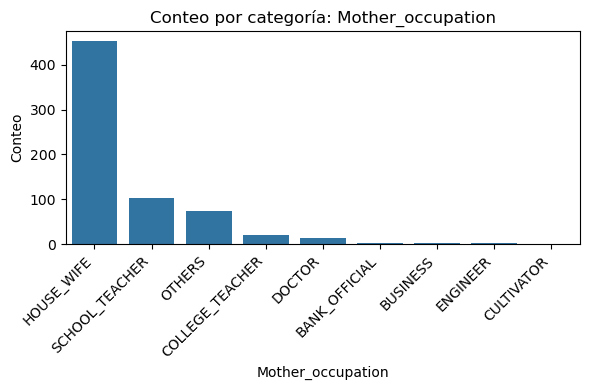

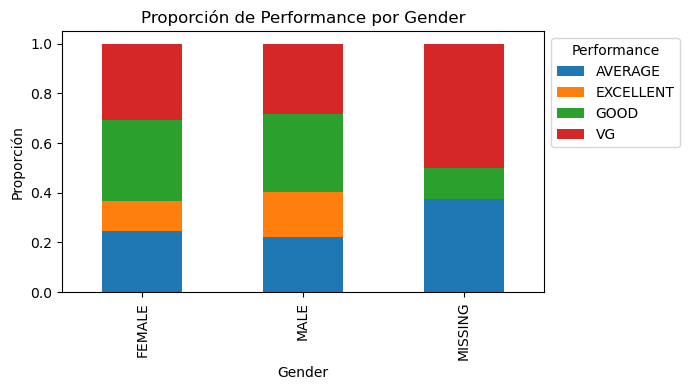

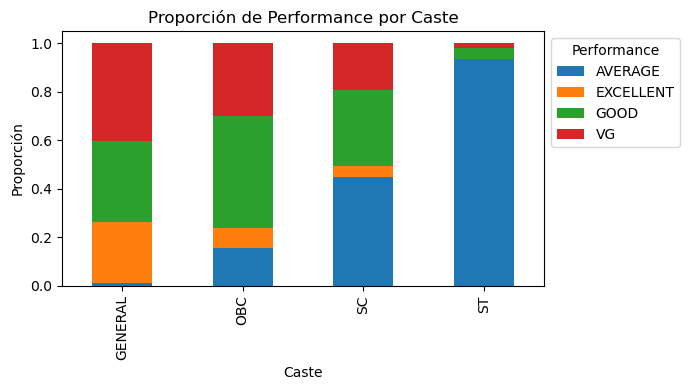

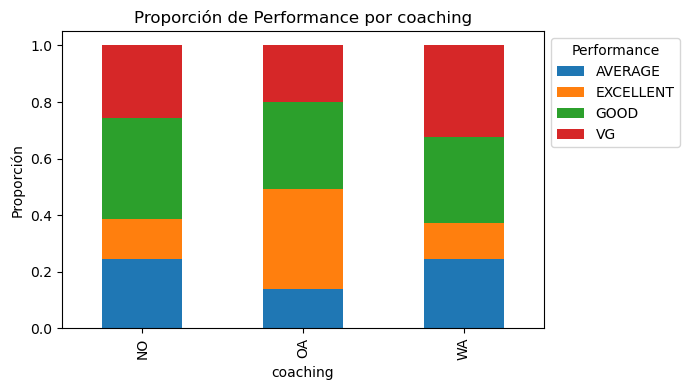

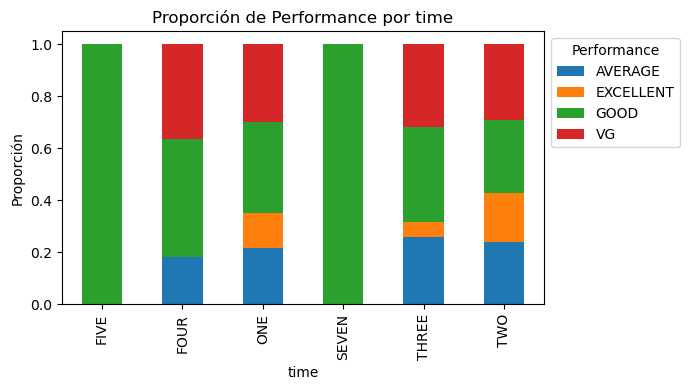

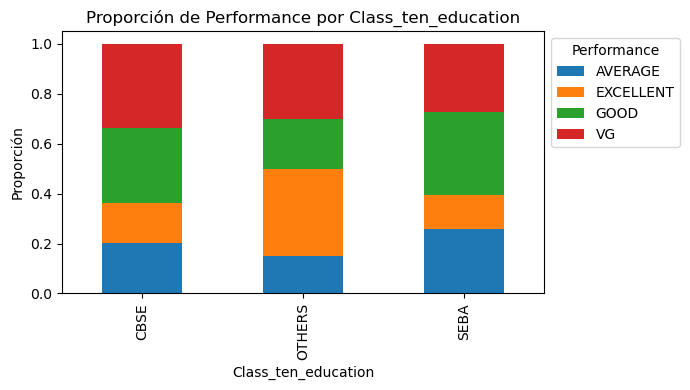

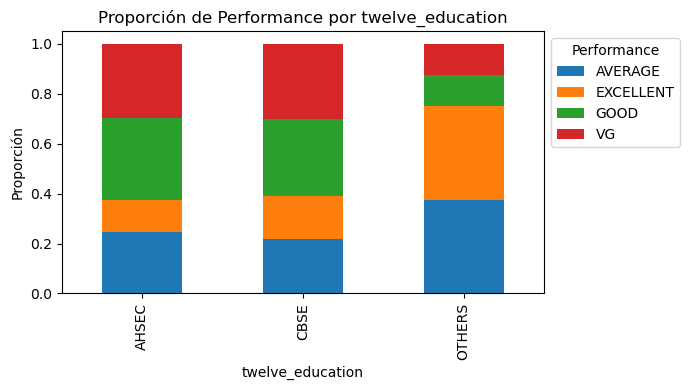

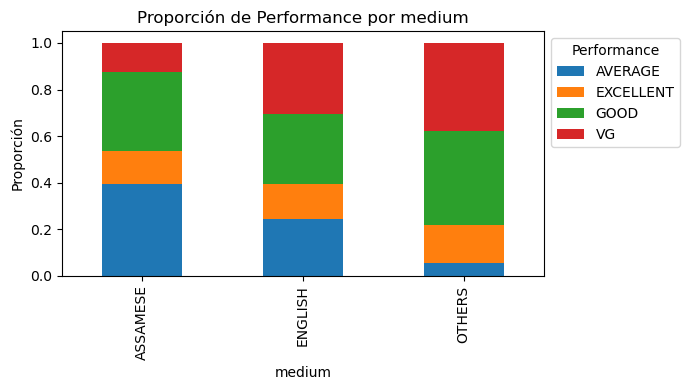

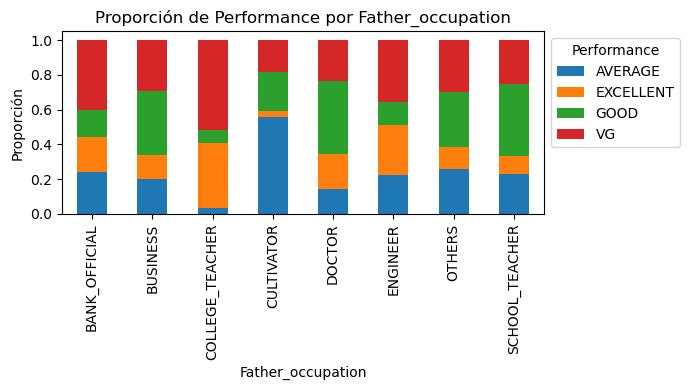

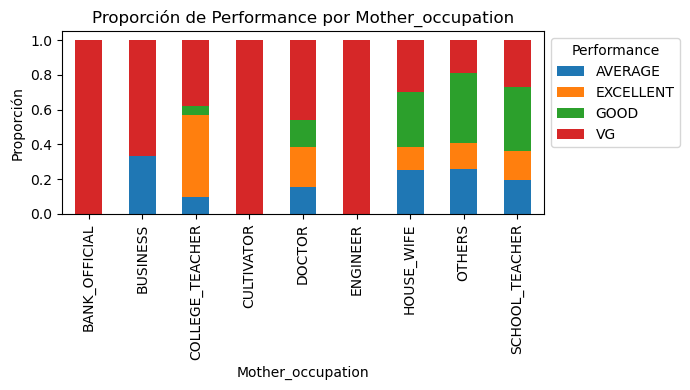

In [26]:
cat_cols = ['Gender', 'Caste', 'coaching', 'time', 'Class_ten_education', 'twelve_education', 'medium', 'Father_occupation', 'Mother_occupation']
# Conteos por categoría
for c in cat_cols:
    plt.figure(figsize=(6,4))
    order = df[c].value_counts().index
    sns.countplot(x=c, data=df, order=order)
    plt.title(f"Conteo por categoría: {c}")
    plt.xlabel(c)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Proporción de rendimiento (stacked) por categórica
def plot_stacked_bar_prop(data, cat, target):
    ct = pd.crosstab(data[cat], data[target], normalize="index")  # proporción por fila
    ct = ct.sort_index()
    ct.plot(kind="bar", stacked=True, figsize=(7,4))
    plt.title(f"Proporción de {target} por {cat}")
    plt.xlabel(cat)
    plt.ylabel("Proporción")
    plt.legend(title=target, bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

for c in cat_cols:
    if df[c].notna().sum() > 0:
        plot_stacked_bar_prop(df, c, target_col)


### 3.2 Matriz de correlación (numéricas) + con objetivo (numérico codificado)

Mapeo objetivo -> numérico: {'POOR': 1, 'AVERAGE': 2, 'GOOD': 3, 'VG': 4, 'EXCELLENT': 5}

Columnas numéricas para correlación: ['Gender', 'Caste', 'coaching', 'time', 'Class_ten_education', 'twelve_education', 'medium', 'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation', 'Performance_num']
Forma del dataframe numérico: (673, 12)


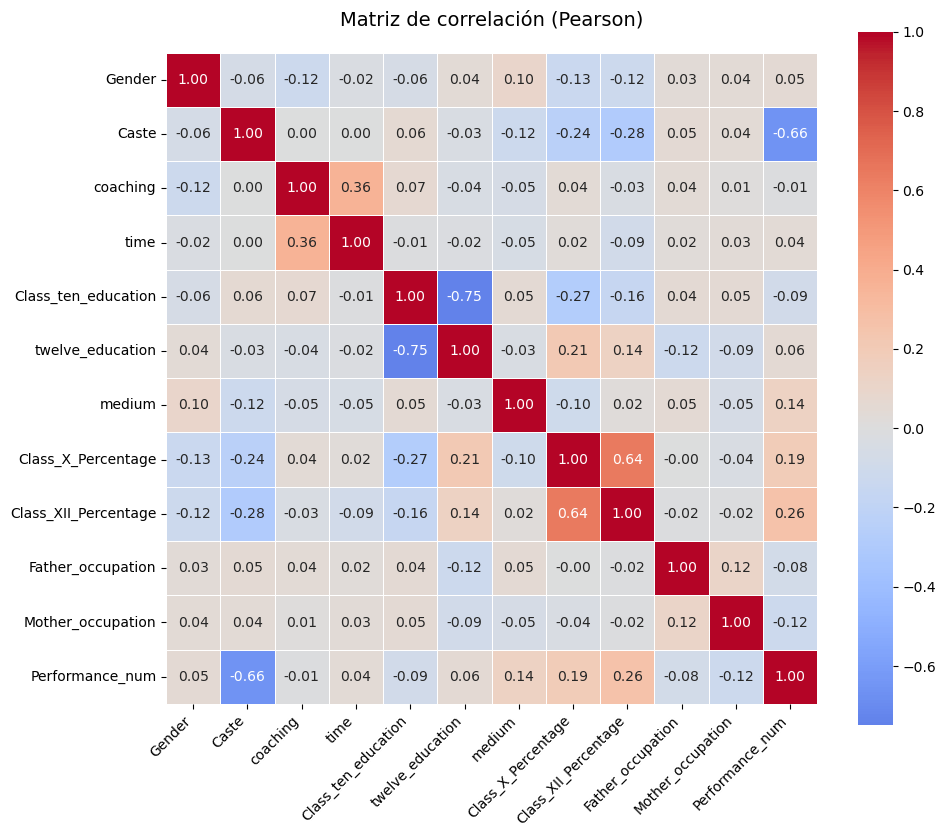


Correlaciones más altas con el objetivo (Performance):


Class_XII_Percentage    0.258992
Class_X_Percentage      0.191433
medium                  0.136596
twelve_education        0.057303
Gender                  0.048250
time                    0.041681
coaching               -0.010800
Father_occupation      -0.079175
Class_ten_education    -0.086153
Mother_occupation      -0.118919
Caste                  -0.655363
Name: Performance_num, dtype: float64


Pares de variables con |correlación| >= 0.6:
  Class_ten_education            — twelve_education              : -0.748
  Caste                          — Performance_num               : -0.655
  Class_X_Percentage             — Class_XII_Percentage          :  0.642


In [27]:
# Crear una copia del dataframe para codificar variables
df_encoded = df.copy()

# Codificar variables ordinales (porcentajes)
ordinal_mappings = {
    'Class_X_Percentage': {'POOR': 1, 'AVERAGE': 2, 'GOOD': 3, 'VG': 4, 'EXCELLENT': 5},
    'Class_XII_Percentage': {'POOR': 1, 'AVERAGE': 2, 'GOOD': 3, 'VG': 4, 'EXCELLENT': 5}
}

for col, mapping in ordinal_mappings.items():
    df_encoded[col] = df[col].map(mapping)

# Codificar variables categóricas nominales con LabelEncoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Caste', 'coaching', 'time', 'Class_ten_education', 
                   'twelve_education', 'medium', 'Father_occupation', 'Mother_occupation']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Codificar la variable objetivo
target_map = {'POOR': 1, 'AVERAGE': 2, 'GOOD': 3, 'VG': 4, 'EXCELLENT': 5}
df_encoded['Performance_num'] = df[target_col].map(target_map)
print("Mapeo objetivo -> numérico:", target_map)

# Seleccionar todas las columnas numéricas codificadas
num_df = df_encoded.select_dtypes(include=[np.number])

print(f"\nColumnas numéricas para correlación: {list(num_df.columns)}")
print(f"Forma del dataframe numérico: {num_df.shape}")

# Correlación (Pearson)
corr = num_df.corr(method="pearson")

# Heatmap
plt.figure(figsize=(max(10, 0.8*len(num_df.columns)), max(8, 0.8*len(num_df.columns))))
sns.heatmap(corr, annot=True, fmt='.2f', cmap="coolwarm", center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriz de correlación (Pearson)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top correlaciones altas con el objetivo
if "Performance_num" in corr.columns:
    target_corr = corr["Performance_num"].drop(labels=["Performance_num"], errors="ignore").sort_values(ascending=False)
    print("\n" + "="*60)
    print("Correlaciones más altas con el objetivo (Performance):")
    print("="*60)
    display(target_corr)

# Identificar pares fuertemente correlacionados entre variables (umbral ajustable)
def high_corr_pairs(corr_mat, threshold=0.6):
    pairs = []
    cols = corr_mat.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = corr_mat.iloc[i, j]
            if abs(val) >= threshold:
                pairs.append((cols[i], cols[j], val))
    return sorted(pairs, key=lambda x: -abs(x[2]))

pairs = high_corr_pairs(corr, threshold=0.6)
print("\n" + "="*60)
print("Pares de variables con |correlación| >= 0.6:")
print("="*60)
if pairs:
    for a, b, v in pairs[:15]:
        print(f"  {a:30s} — {b:30s}: {v:>6.3f}")
else:
    print("  No se encontraron pares con correlación >= 0.6")

# Nota: correlación != causalidad.


## 3.3 Detección de Outliers

,col,q1,q3,iqr,lower_bound,upper_bound,outliers,pct_outliers
0,Class_X_Percentage,5.0,5.0,0.0,5.0,5.0,156,23.18
1,Class_XII_Percentage,4.0,5.0,1.0,2.5,6.5,11,1.63


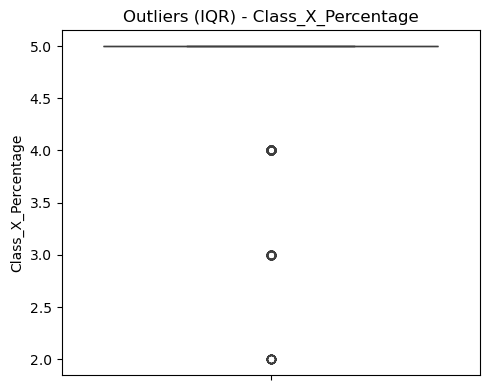

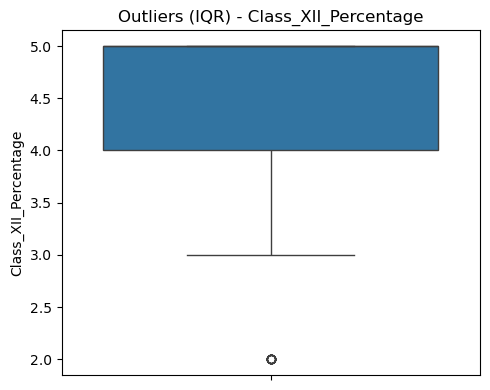

In [28]:
# Nota: Este dataset contiene principalmente variables categóricas y ordinales.
# Para detectar outliers, usaremos las versiones codificadas numéricamente de las variables ordinales
# creadas en la sección 3.2

# Usamos el dataframe codificado del análisis anterior
# Seleccionamos solo las columnas que representan variables ordinales codificadas
ordinal_encoded_cols = ['Class_X_Percentage', 'Class_XII_Percentage']

# Verificar si tenemos columnas numéricas para analizar
numeric_ordinal_cols = [col for col in ordinal_encoded_cols if col in df_encoded.columns 
                        and np.issubdtype(df_encoded[col].dtype, np.number)]

if len(numeric_ordinal_cols) == 0:
    print("="*70)
    print("IMPORTANTE: No hay variables numéricas continuas en este dataset.")
    print("="*70)
    print("\nEste dataset contiene únicamente variables categóricas y ordinales.")
    print("Las columnas Class_X_Percentage y Class_XII_Percentage son categorías")
    print("ordenadas (POOR, AVERAGE, GOOD, VG, EXCELLENT), no valores numéricos.")
    print("\nPara este tipo de datos, el análisis de outliers mediante IQR")
    print("(Interquartile Range) no es aplicable de manera directa.")
    print("\n" + "="*70)
    print("Análisis alternativo: Distribución de categorías ordinales")
    print("="*70 + "\n")
    
    # Mostrar distribución de las variables ordinales
    for col in ['Class_X_Percentage', 'Class_XII_Percentage']:
        print(f"\n{col}:")
        print("-" * 50)
        counts = df[col].value_counts().sort_index()
        display(pd.DataFrame({
            'Categoría': counts.index,
            'Frecuencia': counts.values,
            'Porcentaje': (counts.values / counts.sum() * 100).round(2)
        }).reset_index(drop=True))
        
        # Gráfico de barras
        plt.figure(figsize=(8, 5))
        order = ['POOR', 'AVERAGE', 'GOOD', 'VG', 'EXCELLENT']
        # Filtrar solo las categorías que existen en los datos
        order_filtered = [cat for cat in order if cat in counts.index]
        sns.countplot(x=col, data=df, order=order_filtered, palette='viridis')
        plt.title(f'Distribución de {col}')
        plt.xlabel('Categoría de rendimiento')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    print("\n" + "="*70)
    print("Conclusión sobre outliers:")
    print("="*70)
    print("En variables categóricas ordinales, los 'outliers' se interpretan como")
    print("categorías con muy baja frecuencia. En este caso, todas las categorías")
    print("presentes representan valores válidos del dominio del problema.")
else:
    # Si hay columnas numéricas (caso hipotético para versiones codificadas)
    def iqr_outlier_mask(series, k=1.5):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        return (series < lower) | (series > upper), lower, upper, q1, q3

    outlier_report = []
    for col in numeric_ordinal_cols:
        s = df_encoded[col].dropna()
        if s.empty: 
            continue
        mask, lower, upper, q1, q3 = iqr_outlier_mask(s, k=1.5)
        count_out = mask.sum()
        outlier_report.append({
            "col": col,
            "q1": q1, "q3": q3, "iqr": q3-q1,
            "lower_bound": lower, "upper_bound": upper,
            "outliers": int(count_out), "pct_outliers": round(100*count_out/len(s), 2)
        })

    outlier_df = pd.DataFrame(outlier_report).sort_values(by="pct_outliers", ascending=False)
    display(outlier_df)

    # Visual de outliers (boxplots individuales)
    for col in numeric_ordinal_cols:
        plt.figure(figsize=(5,4))
        sns.boxplot(y=df_encoded[col])
        plt.title(f"Outliers (IQR) - {col}")
        plt.tight_layout()
        plt.show()


## 4. Guardar Dataset y Versionar con DVC

In [ ]:
# === Guardar dataset limpio (nueva versión para DVC) ===
OUTPUT_PATH = "../data/processed"
OUTPUT_FILENAME = "student_performance.csv"
OUTPUT_FULL_PATH = f"{OUTPUT_PATH}/{OUTPUT_FILENAME}"

df.to_csv(OUTPUT_FULL_PATH, index=False)

print("="*70)
print("✅ PASO 1 COMPLETADO: Dataset limpio guardado")
print("="*70)
print(f"📂 Ruta: {OUTPUT_FULL_PATH}")
print(f"📊 Filas finales: {len(df)} | Columnas: {len(df.columns)}")
print(f"📉 Reducción: {len(df_raw)} → {len(df)} filas")
print("\n" + "="*70)
print("📦 SIGUIENTE PASO: Versionar con DVC")
print("="*70)
print("\nEjecuta estos comandos en la terminal:\n")
print("# Opción A: Usar el script rápido")
print(f"bash add_to_dvc.sh {OUTPUT_FULL_PATH} data-v1.1-cleaned 'After EDA cleaning'")
print("\n# Opción B: Comandos manuales")
print(f"dvc add {OUTPUT_FULL_PATH}")
print(f"git add {OUTPUT_FULL_PATH}.dvc")
print('git commit -m "feat: apply EDA cleaning - normalize text, handle nulls"')
print('git tag -a "data-v1.1-cleaned" -m "Version 1.1: Data after EDA cleaning"')
print("dvc push")
print("git push --tags")
print("\n" + "="*70)
print("🔄 PRÓXIMO NOTEBOOK: Preprocesamieto de Datos.ipynb")
print("="*70)

Dataset modificado guardado en: ../data/processed/student_entry_performance_modified_after_eda.csv
Filas finales: 673 | Columnas: 12
